### Load the dataset

In [1]:
import zipfile

In [2]:
with zipfile.ZipFile('archive (4).zip','r') as myzipf:
    myzipf.extractall()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Analysing the structure of the dataframe

In [5]:
cancer_df.shape

(569, 32)

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
cancer_df.duplicated().sum()

0

In [8]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Drop all unnecessary columns

In [9]:
cancer_df.drop(cancer_df.loc[:,'symmetry_mean':'fractal_dimension_worst'],inplace = True, axis=1)

In [10]:
cancer_df.drop('id',inplace=True,axis=1)

In [11]:
# Assess the number of rows and columns
cancer_df.shape

(569, 9)

In [12]:
cancer_df['perimeter_mean']=cancer_df.query('perimeter_mean < 130')['perimeter_mean']

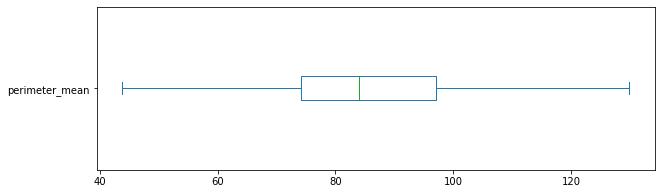

In [13]:
cancer_df['perimeter_mean'].plot(kind='box',figsize=(10,3),vert=False);

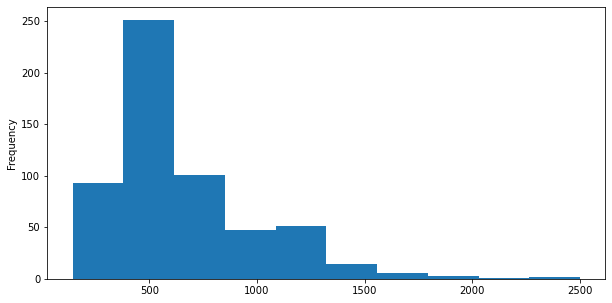

In [14]:
cancer_df['area_mean'].plot(kind='hist',figsize=(10,5));

In [15]:
cols = ['radius_mean', 'perimeter_mean','area_mean'] # one or more

Q1 = cancer_df[cols].quantile(0.25)
Q3 = cancer_df[cols].quantile(0.75)
IQR = Q3 - Q1

cancer_df = cancer_df[~((cancer_df[cols] < (Q1 - 1.5 * IQR)) |(cancer_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
cancer_df['area_mean']= cancer_df.query('area_mean < 1000')['area_mean']

In [17]:
cancer_df.shape

(544, 9)

In [18]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 568
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            544 non-null    object 
 1   radius_mean          544 non-null    float64
 2   texture_mean         544 non-null    float64
 3   perimeter_mean       516 non-null    float64
 4   area_mean            477 non-null    float64
 5   smoothness_mean      544 non-null    float64
 6   compactness_mean     544 non-null    float64
 7   concavity_mean       544 non-null    float64
 8   concave points_mean  544 non-null    float64
dtypes: float64(8), object(1)
memory usage: 42.5+ KB


In [19]:
mean = cancer_df['area_mean'].mean()
cancer_df['area_mean'] = cancer_df['area_mean'].fillna(mean)

In [20]:
peri_mean = cancer_df['perimeter_mean'].mean()
cancer_df['perimeter_mean'] = cancer_df['perimeter_mean'].fillna(peri_mean)

## Analysis to show if radius, perimeter and area affect the diagnosis of breast cancer.

 > We will begin our research with individual analysis of the radius, perimeter, and area and their relationship to the diagnosis.

In [21]:
def diagnosis(x):
    ax = cancer_df.groupby('diagnosis')[x].mean().plot(kind='bar')
    for container in ax.containers:
        ax.bar_label(container)
    return ax

<AxesSubplot:xlabel='diagnosis'>

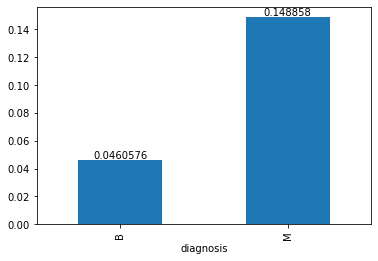

In [22]:
diagnosis('concavity_mean')

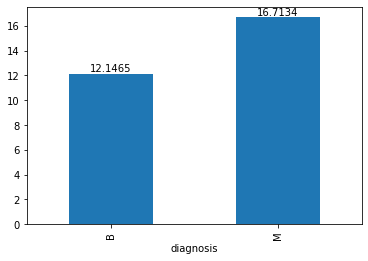

In [23]:
diagnosis('radius_mean');

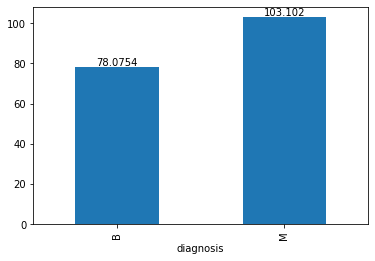

In [24]:
diagnosis('perimeter_mean');

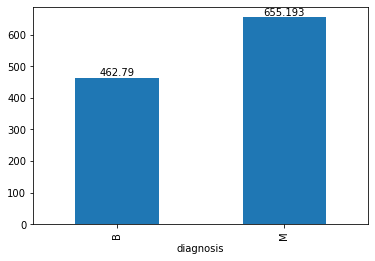

In [25]:
diagnosis('area_mean');

> The relationship seen within this side-by-side comparison is that each variable of size (radius, perimeter, and area) shares a positive correlation with malignancy. As the size of each variable increases, there is a higher likelihood of being categorized as malignant.

>This shared relationship is not surprising since a greater radius would signify a greater perimeter, which would signify a greater area.Therefore, we can conclude that large cell nuclei could increase the likelihood of malignancy.

### Compactness and Smoothness
> Smoothness is calculated by the local variation in radius lengths within cell nuclei. The closer it is to zero, the less variation and the more smooth the cell nuclei are. The further away it is from zero, the more variability and less smooth the cell nuclei are.
> We see that on average, malignant cells have more variation and are less smooth.

>Compactness is defined by the cell’s ability to be packed together closely.
> The closer you are to zero the higher the likelihood you have benign cell nuclei and the further you are from zero the higher the likelihood you have malignant cell nuclei.

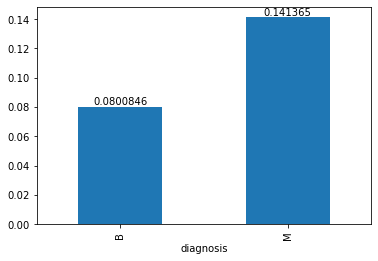

In [26]:
diagnosis('compactness_mean');

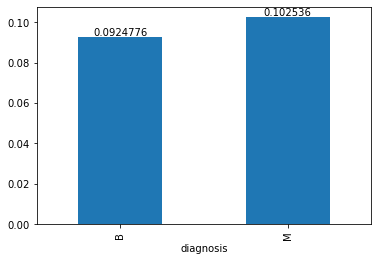

In [27]:
diagnosis('smoothness_mean');

### texture and concavity

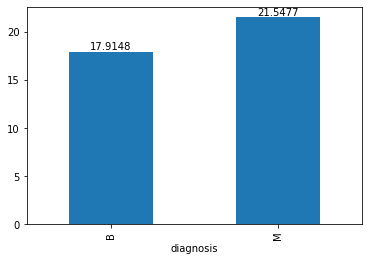

In [28]:
diagnosis('texture_mean');

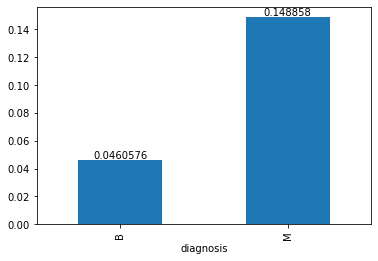

In [29]:
diagnosis('concavity_mean');

> Within this section of the analysis, concavity represents the severity of concave points of the contour and the concave points represent the number of concave points of the contour. The further away it is from zero, the more severe the concave points are and the higher the total number of concave points are.
> As seen above, the higher the average concavity, the higher the likelihood of malignancy.

### Conclusion

> Understanding the correlation between nuclear morphometry and diagnosis can lead to an early and accurate diagnosis. Which can lead to early treatment. As shown in this analysis, the radius, perimeter, area, smoothness, compactness, concavity, and the number of concave points all showed a positive correlation with malignancy. As the number grew further from zero, the higher the likelihood of malignancy.

### Create a dummy column.
> Create a dummy column for the diagnosis column, append it to the dataframe then drop the diagnosis column

In [30]:
dummy = pd.get_dummies(cancer_df['diagnosis'])

In [31]:
dummy

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
562,0,1
565,0,1
566,0,1
567,0,1


In [32]:
cancer_df = pd.concat((cancer_df,dummy),axis=1)

In [33]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,B,M
0,M,17.99,10.38,122.800000,528.928512,0.11840,0.27760,0.3001,0.14710,0,1
1,M,20.57,17.77,86.678256,528.928512,0.08474,0.07864,0.0869,0.07017,0,1
2,M,19.69,21.25,86.678256,528.928512,0.10960,0.15990,0.1974,0.12790,0,1
3,M,11.42,20.38,77.580000,386.100000,0.14250,0.28390,0.2414,0.10520,0,1
4,M,20.29,14.34,86.678256,528.928512,0.10030,0.13280,0.1980,0.10430,0,1


In [34]:
cancer_df.drop(['diagnosis','B'],inplace=True,axis=1)

In [35]:
cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,M
0,17.99,10.38,122.800000,528.928512,0.11840,0.27760,0.3001,0.14710,1
1,20.57,17.77,86.678256,528.928512,0.08474,0.07864,0.0869,0.07017,1
2,19.69,21.25,86.678256,528.928512,0.10960,0.15990,0.1974,0.12790,1
3,11.42,20.38,77.580000,386.100000,0.14250,0.28390,0.2414,0.10520,1
4,20.29,14.34,86.678256,528.928512,0.10030,0.13280,0.1980,0.10430,1


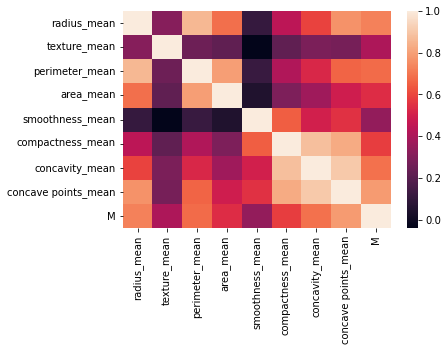

In [36]:
corr = cancer_df.corr()
sns.heatmap(corr);

In [37]:
features =['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean', 'concavity_mean',
       'concave points_mean']
X = cancer_df[features]

In [38]:
target = 'M'
y = cancer_df[target]

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
model.score(X_test,y_test)

0.8823529411764706

<AxesSubplot:>

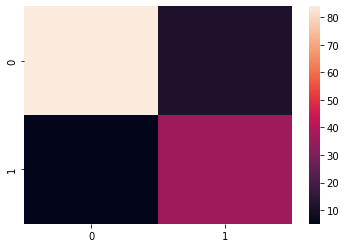

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred))